In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from collections import defaultdict
import pickle

# sns.set_style("whitegrid")
sns.set(style={'style': "whitegrid", 'axes.grid' : False}, font_scale=1.5)

In [12]:
def clean_data(df):
    df = df.drop(df[df['Column1.2'] != 'platypus.core'].index)
    del df['Column1.1']
    del df['Column1.2']
    del df['Column1.5']
    del df['Column1.6']
    del df['Column1.7']
    
    df['nfe'] = pd.to_numeric(df['Column1.4']).diff().fillna(100)
    del df['Column1.4']
    df.rename(columns={"Column1.3": "time (s)"})
    
    df['time per nfe'] = pd.to_numeric(df['Column1.3']) / df['nfe']
    del df['Column1.3']
    
    return df

In [13]:
with open(f'./cleaned_data/num_nodes_orig.pkl', 'rb') as f:
    num_nodes_orig = pickle.load(f)

results = {}
orig_times = {}
SSR = 0
for city in ['Winterswijk', 'Manhattan', 'Utrecht', 'Amsterdam', 'Rotterdam']:
    df = pd.read_excel('../HPC_results/timing/nfetimer_orig_new.xlsx', sheet_name=f'{city}_0')
    df = clean_data(df)
    
    orig_times[city] = sum(df['time per nfe'])/len(df['time per nfe'])*1000
    results[('original', city, num_nodes_orig[city])] = sum(df['time per nfe'])/len(df['time per nfe'])*1000
    # df
    print(f'ORIG TIME PER NFE {city}: ', sum(df['time per nfe'])/len(df['time per nfe'])*1000, ' MILISECONDS')
    
#     
# SSR = 1
# for city in ['Winterswijk', 'Manhattan', 'Utrecht', 'Amsterdam', 'Rotterdam']:
#     df = pd.read_excel('../HPC_results/timing/nfetimer_orig_new.xlsx', sheet_name=f'{city}_1')
#     df = clean_data(df)
#     
#     orig_times[city] = sum(df['time per nfe'])/len(df['time per nfe'])*1000
#     results[('original-withSSR', city, num_nodes_orig[city])] = sum(df['time per nfe'])/len(df['time per nfe'])*1000
#     # df
#     print(f'ORIG (WITH SSR) TIME PER NFE {city}: ', sum(df['time per nfe'])/len(df['time per nfe'])*1000, ' MILISECONDS')

ORIG TIME PER NFE Winterswijk:  2.1163871253173845  MILISECONDS
ORIG TIME PER NFE Manhattan:  3.045912690799335  MILISECONDS
ORIG TIME PER NFE Utrecht:  5.666084206969805  MILISECONDS
ORIG TIME PER NFE Amsterdam:  3.198303209104285  MILISECONDS
ORIG TIME PER NFE Rotterdam:  13.172444482100316  MILISECONDS


In [14]:
with open(f'./cleaned_data/num_nodes_pruning.pkl', 'rb') as f:
    num_nodes = pickle.load(f)

max_iter_dict = {
    'Winterswijk': 5,
    'Manhattan': 1,
    'Utrecht': 6, 
    'Amsterdam': 6, 
    'Rotterdam': 7
}

for city in ['Winterswijk', 'Manhattan', 'Utrecht', 'Amsterdam', 'Rotterdam']:

    df = pd.read_excel('../HPC_results/timing/nfetimer_pruning.xlsx', sheet_name=f'{city}')
    df = clean_data(df)

    nfetime = sum(df['time per nfe'])/len(df['time per nfe'])*1000
    results[('pruning', city, num_nodes[city, max_iter_dict[city]-1])] = nfetime

    print(f'PRUNING TIME PER NFE {city}: ', nfetime, ' MILISECONDS (a ', round((1-(nfetime/orig_times[city]))*100, 2), '% reduction)')

PRUNING TIME PER NFE Winterswijk:  1.594286364367716  MILISECONDS (a  24.67 % reduction)
PRUNING TIME PER NFE Manhattan:  3.1698585957741834  MILISECONDS (a  -4.07 % reduction)
PRUNING TIME PER NFE Utrecht:  4.945557123737032  MILISECONDS (a  12.72 % reduction)
PRUNING TIME PER NFE Amsterdam:  3.4186200488935965  MILISECONDS (a  -6.89 % reduction)
PRUNING TIME PER NFE Rotterdam:  6.00268144511911  MILISECONDS (a  54.43 % reduction)


In [15]:
with open(f'./cleaned_data/num_nodes_consolidated.pkl', 'rb') as f:
    num_nodes = pickle.load(f)

for city in ['Winterswijk', 'Manhattan', 'Utrecht', 'Amsterdam', 'Rotterdam']:
# for city in ['Winterswijk']:
    for tolerance in [10, 30, 50]:
        df = pd.read_excel('../HPC_results/timing/nfetimer_consolidated.xlsx', sheet_name=f'{city}_{tolerance}')
        df = clean_data(df)
        
        nfetime = sum(df['time per nfe'])/len(df['time per nfe'])*1000
        results[('consolidated', city, num_nodes[city, tolerance])] = nfetime
        
        print(f'CONSOLIDATED TIME PER NFE {city}, {tolerance}: ', nfetime, ' MILISECONDS (a ', round((1-(nfetime/orig_times[city]))*100, 2), '% reduction)')

CONSOLIDATED TIME PER NFE Winterswijk, 10:  1.1945974278857283  MILISECONDS (a  43.55 % reduction)
CONSOLIDATED TIME PER NFE Winterswijk, 30:  0.6437782647306844  MILISECONDS (a  69.58 % reduction)
CONSOLIDATED TIME PER NFE Winterswijk, 50:  0.420958426564645  MILISECONDS (a  80.11 % reduction)
CONSOLIDATED TIME PER NFE Manhattan, 10:  2.7145630289069445  MILISECONDS (a  10.88 % reduction)
CONSOLIDATED TIME PER NFE Manhattan, 30:  2.194508415788833  MILISECONDS (a  27.95 % reduction)
CONSOLIDATED TIME PER NFE Manhattan, 50:  0.4273204911498118  MILISECONDS (a  85.97 % reduction)
CONSOLIDATED TIME PER NFE Utrecht, 10:  3.991578322084931  MILISECONDS (a  29.55 % reduction)
CONSOLIDATED TIME PER NFE Utrecht, 30:  1.7816048755546332  MILISECONDS (a  68.56 % reduction)
CONSOLIDATED TIME PER NFE Utrecht, 50:  0.5308595865426898  MILISECONDS (a  90.63 % reduction)
CONSOLIDATED TIME PER NFE Amsterdam, 10:  1.982171171372614  MILISECONDS (a  38.02 % reduction)
CONSOLIDATED TIME PER NFE Amsterda

In [16]:
with open(f'./cleaned_data/num_nodes_panchamy.pkl', 'rb') as f:
    num_nodes = pickle.load(f)

for city in ['Winterswijk', 'Manhattan', 'Utrecht', 'Amsterdam', 'Rotterdam']:
# for city in ['Winterswijk']:
    for weight_type in [0, 1]:
        for pruning in [0, 1]:
            weight_types = ['type', 'betweenness']
            df = pd.read_excel('../HPC_results/timing/nfetimer_panchamy.xlsx', sheet_name=f'{city}_{weight_type}_{pruning}')
            df = clean_data(df)
            
            nfetime = sum(df['time per nfe'])/len(df['time per nfe'])*1000
            if weight_type == 0:
                results[('panchamy-type', city, num_nodes[weight_types[weight_type], city, pruning, 1000, 1000])] = nfetime
            else:
                results[('panchamy-betweenness', city, num_nodes[weight_types[weight_type], city, pruning, 1000, 1000])] = nfetime
        
            print(f'PANCHAMY TIME PER NFE {city}, {weight_types[weight_type]}, pruning: {pruning}: ', nfetime, ' MILISECONDS (a ', round((1-(nfetime/orig_times[city]))*100, 2), '% reduction)')

PANCHAMY TIME PER NFE Winterswijk, type, pruning: 0:  1.8774431969209222  MILISECONDS (a  11.29 % reduction)
PANCHAMY TIME PER NFE Winterswijk, type, pruning: 1:  1.1592343398531073  MILISECONDS (a  45.23 % reduction)
PANCHAMY TIME PER NFE Winterswijk, betweenness, pruning: 0:  1.8160442761055167  MILISECONDS (a  14.19 % reduction)
PANCHAMY TIME PER NFE Winterswijk, betweenness, pruning: 1:  1.1932547259076207  MILISECONDS (a  43.62 % reduction)
PANCHAMY TIME PER NFE Manhattan, type, pruning: 0:  2.631833458340149  MILISECONDS (a  13.59 % reduction)
PANCHAMY TIME PER NFE Manhattan, type, pruning: 1:  2.658485374027545  MILISECONDS (a  12.72 % reduction)
PANCHAMY TIME PER NFE Manhattan, betweenness, pruning: 0:  2.6665752419630477  MILISECONDS (a  12.45 % reduction)
PANCHAMY TIME PER NFE Manhattan, betweenness, pruning: 1:  2.5786655921777797  MILISECONDS (a  15.34 % reduction)
PANCHAMY TIME PER NFE Utrecht, type, pruning: 0:  4.877003245900345  MILISECONDS (a  13.93 % reduction)
PANCHA

In [17]:
with open(f'./cleaned_data/num_nodes_onthefly.pkl', 'rb') as f:
    num_nodes = pickle.load(f)

for city in ['Winterswijk', 'Manhattan', 'Utrecht', 'Amsterdam', 'Rotterdam']:
    
    df = pd.read_excel('../HPC_results/timing/nfetimer_onthefly.xlsx', sheet_name=f'{city}')
    df = clean_data(df)
    
    nfetime = sum(df['time per nfe'])/len(df['time per nfe'])*1000
    results[('onthefly', city, num_nodes[city])] = nfetime
    
    print(f'ON-THE-FLY TIME PER NFE {city}: ', nfetime, ' MILISECONDS (a ', round((1-(nfetime/orig_times[city]))*100, 2), '% reduction)')

ON-THE-FLY TIME PER NFE Winterswijk:  1.4543528471164253  MILISECONDS (a  31.28 % reduction)
ON-THE-FLY TIME PER NFE Manhattan:  4.987507510926278  MILISECONDS (a  -63.74 % reduction)
ON-THE-FLY TIME PER NFE Utrecht:  7.382461628243632  MILISECONDS (a  -30.29 % reduction)
ON-THE-FLY TIME PER NFE Amsterdam:  3.5200272352527633  MILISECONDS (a  -10.06 % reduction)
ON-THE-FLY TIME PER NFE Rotterdam:  13.476217375036933  MILISECONDS (a  -2.31 % reduction)


In [18]:
results_df = pd.DataFrame([[k[0],k[1], k[2],v] for k,v in results.items()]).rename(columns={0:'approach', 1:'city', 2:'num_nodes',3:'time_per_nfe'})

with open(f'./cleaned_data/timing_results.pkl', 'wb') as f:
    pickle.dump(results, f)

['approach', 'original', 'pruning', 'consolidated', 'panchamy-type', 'panchamy-betweenness', 'onthefly', 'city', 'Winterswijk', 'Manhattan', 'Utrecht', 'Amsterdam', 'Rotterdam']


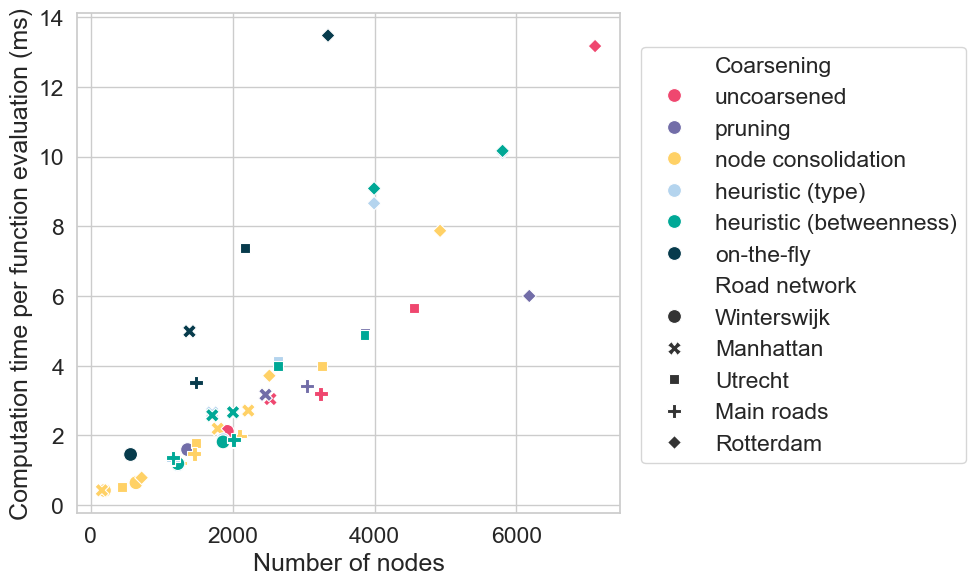

In [44]:
sns.set(style={'style': "whitegrid", 'axes.grid' : False}, font_scale=1.5)

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(7,6.5))
    my_palette = ['#073b4c', '#f78664', '#06d6a0', '#ffd166', '#118ab2', '#e11444']
    my_palette = ['#EF476F', '#726DA8', '#FFD166', '#B4D4EE', '#00A896', '#073b4c']
    # sns.scatterplot(data, x='% node reduction', y='% degradation', hue='weights', style='city', size='pruning', legend="full")
    sns.scatterplot(results_df, x='num_nodes', y='time_per_nfe', hue='approach', style='city', s=100, legend="full", palette=my_palette)
    plt.ylabel('Computation time per function evaluation (ms)')
    plt.xlabel('Number of nodes')
    # plt.ylim(-5, 105)
    # plt.xlim(-5, 100)
    # ax=plt.gca()
    
    handles, l = ax.get_legend_handles_labels()
    print(l)
    labels = ['Coarsening', 'uncoarsened', 'pruning', 'node consolidation', 'heuristic (type)', 'heuristic (betweenness)', 'on-the-fly', 'Road network', 'Winterswijk', 'Manhattan', 'Utrecht', 'Main roads', 'Rotterdam']
    # labels = ['pruning', 'node consolidation', 'on-the-fly', 'heuristic (type)', 'heuristic (betweenness)']        
    ax.legend(handles=handles, labels=labels, loc=(1.04, 0.1))

    # plt.subplots_adjust(top=1.2, bottom=0.05)
    plt.savefig(f'figs/time_per_nfe.png', bbox_inches='tight', dpi=300)